In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Carregando o dataset
hcc = pd.read_csv("hcc_dataset.csv", sep=",", na_values= ['?'])

#Vendo os valores vazios de cada coluna
for column in hcc.columns:
    print(column, ' - ', hcc[column].isnull().sum())

Gender  -  0
Symptoms  -  18
Alcohol  -  0
HBsAg  -  17
HBeAg  -  39
HBcAb  -  24
HCVAb  -  9
Cirrhosis  -  0
Endemic  -  39
Smoking  -  41
Diabetes  -  3
Obesity  -  10
Hemochro  -  23
AHT  -  3
CRI  -  2
HIV  -  14
NASH  -  22
Varices  -  52
Spleno  -  15
PHT  -  11
PVT  -  3
Metastasis  -  4
Hallmark  -  2
Age  -  0
Grams_day  -  48
Packs_year  -  53
PS  -  0
Encephalopathy  -  143
Ascites  -  111
INR  -  4
AFP  -  8
Hemoglobin  -  3
MCV  -  3
Leucocytes  -  3
Platelets  -  3
 Albumin  -  6
Total_Bil  -  5
ALT  -  4
AST  -  3
GGT  -  3
ALP  -  3
TP  -  11
Creatinine  -  7
Nodules  -  2
Major_Dim  -  20
Dir_Bil  -  44
Iron  -  79
Sat  -  80
Ferritin  -  80
Class  -  0


In [2]:
#Analisando os valores NaN 
hcc['Encephalopathy']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
160    NaN
161    NaN
162    NaN
163    NaN
164    NaN
Name: Encephalopathy, Length: 165, dtype: object

In [3]:
hcc['Ascites']
#Se formos comparar esses valores no dataset veremos que eles não estão vazios, mas sim com o valor None,que é imterpretado como NaN
#Logo precisamos tratar isso

0       NaN
1       NaN
2      Mild
3       NaN
4       NaN
       ... 
160     NaN
161     NaN
162     NaN
163     NaN
164     NaN
Name: Ascites, Length: 165, dtype: object

In [4]:
#Precisamos ver se não há valores que deveriam ser vazios
for column in hcc.columns:
    print(hcc[column].value_counts())
#Com isso conseguimos ver que há muitos valores com uma '?' o que possivelmente significa não foi passado nenhuma informação para esses valores

Gender
Male      133
Female     32
Name: count, dtype: int64
Symptoms
Yes    94
No     53
Name: count, dtype: int64
Alcohol
Yes    122
No      43
Name: count, dtype: int64
HBsAg
No     132
Yes     16
Name: count, dtype: int64
HBeAg
No     125
Yes      1
Name: count, dtype: int64
HBcAb
No     103
Yes     38
Name: count, dtype: int64
HCVAb
No     122
Yes     34
Name: count, dtype: int64
Cirrhosis
Yes    149
No      16
Name: count, dtype: int64
Endemic
No     116
Yes     10
Name: count, dtype: int64
Smoking
Yes    63
No     61
Name: count, dtype: int64
Diabetes
No     106
Yes     56
Name: count, dtype: int64
Obesity
No     135
Yes     20
Name: count, dtype: int64
Hemochro
No     135
Yes      7
Name: count, dtype: int64
AHT
No     103
Yes     59
Name: count, dtype: int64
CRI
No     143
Yes     20
Name: count, dtype: int64
HIV
No     148
Yes      3
Name: count, dtype: int64
NASH
No     135
Yes      8
Name: count, dtype: int64
Varices
Yes    69
No     44
Name: count, dtype: int64
Spleno
Yes 

In [5]:
hcc.info()
#Além disso podemos perceber que existem colunas que deveriam ser de algum tipo numérico mas são objetos, então também precisamos tratar isso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

In [6]:
#Para facilitar a nossa análise vamos ajeitar os pontos citados anteriormente

#Ajetiando os valores nulos
hcc.replace(np.nan, 'None', inplace=True) #Na tabela tem células com o valor None que ele interpreta como um np.nan, então precisamos garantir que ele vai entender isso como um valor válido
hcc.replace('?', np.nan, inplace=True) #As células vazias possuem uma '?', então aqui dizemos que essas células sõa NaN 

hcc.info()
#Após fazer essa mudança fica claro que nós temos muitos valores nulos para tratar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [7]:
#Convertendo as colunas numéricas
for column in hcc.columns:
    #Convertendo os valores que são numéricos para float
    if hcc[column].dtype == 'object':
        try:
            if hcc[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull().any() and column != 'Nodules': # Pois Nodules é uma categoria apesar de ser definido por números
                hcc[column] = pd.to_numeric(hcc[column], errors='coerce')
        except ValueError:
            try:
                hcc[column] = pd.to_datetime(hcc[column], errors='coerce')
            except ValueError:
                pass
hcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        165 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           165 non-null    object 
 4   HBeAg           165 non-null    object 
 5   HBcAb           165 non-null    object 
 6   HCVAb           165 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         165 non-null    object 
 9   Smoking         165 non-null    object 
 10  Diabetes        165 non-null    object 
 11  Obesity         165 non-null    object 
 12  Hemochro        165 non-null    object 
 13  AHT             165 non-null    object 
 14  CRI             165 non-null    object 
 15  HIV             165 non-null    object 
 16  NASH            165 non-null    object 
 17  Varices         165 non-null    obj

In [8]:
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

encoded_hcc = deepcopy(hcc)
label_encoders = {}

# Codificando variáveis categóricas para aplicar a matriz de correlação
for column in encoded_hcc:
    if(hcc[column].dtype == 'object'):
        label_encoders[column] = LabelEncoder()
        encoded_hcc[column] = label_encoders[column].fit_transform(hcc[column].astype(str))
        if hcc[column].isna().any():
            nan_encoded = label_encoders[column].transform(['nan'])[0]
            encoded_hcc[column] = encoded_hcc[column].replace(nan_encoded, np.nan)

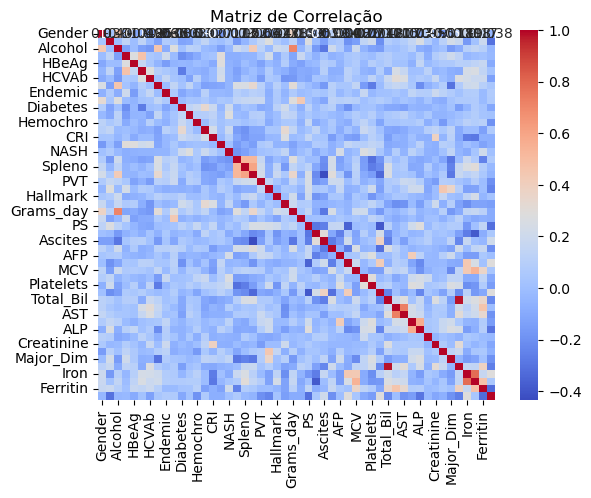

Correlação com a variável alvo (class):
Hemoglobin        0.292357
Iron              0.291406
 Albumin          0.287799
Ascites           0.205639
Endemic           0.074278
Varices           0.069697
Smoking           0.068555
AHT               0.067974
Encephalopathy    0.053670
Sat               0.043110
MCV               0.042074
Cirrhosis         0.037557
Hallmark          0.020544
Obesity           0.020205
HBcAb             0.017629
NASH              0.012127
AFP               0.001972
ALT              -0.006058
HBsAg            -0.025376
Spleno           -0.028016
TP               -0.029274
Gender           -0.038435
Alcohol          -0.040302
PHT              -0.053905
Nodules          -0.069532
CRI              -0.075213
HIV              -0.078004
Grams_day        -0.086573
Packs_year       -0.089814
HBeAg            -0.093586
Leucocytes       -0.102192
Diabetes         -0.106988
Creatinine       -0.108708
HCVAb            -0.131954
Age              -0.146054
GGT            

In [9]:
# Calculando a matriz de correlação para variáveis numéricas, incluindo a variável alvo codificada
correlation_matrix = encoded_hcc.corr()

# Visualizando a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Correlação específica das variáveis numéricas com a variável alvo
target_corr = correlation_matrix['Class'].drop('Class')
print("Correlação com a variável alvo (class):")
print(target_corr.sort_values(ascending=False))


# Cria uma lista de colunas com correlação maior que 0.20 ou menor que -0.20
selected_columns = target_corr[abs(target_corr) > 0.20].index.tolist()
print("\nColunas com correlação maior que 0.20 ou menor que -0.20 com a variável alvo:")
print(selected_columns)

# Cria uma lista de colunas com correlação maior que 0.25 ou menor que -0.25
selected_columns = target_corr[abs(target_corr) > 0.25].index.tolist()
print("\nColunas com correlação maior que 0.25 ou menor que -0.25 com a variável alvo:")
print(selected_columns)

# Cria uma lista de colunas com correlação maior que 0.25 ou menor que -0.25
selected_columns = target_corr[abs(target_corr) > 0.29].index.tolist()
print("\nColunas com correlação maior que 0.29 ou menor que -0.29 com a variável alvo:")
print(selected_columns)


In [10]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

categorical_cols = hcc.select_dtypes(include=['object', 'category'])
categorical_cols = categorical_cols.drop(columns = ['Class'])

# Calculando Cramér's V para variáveis categóricas
cramers = {}
for column in categorical_cols:
    contingency_table = pd.crosstab(hcc[column], hcc['Class'])
    cramers_v_value = cramers_v(contingency_table.to_numpy())
    cramers[column] = cramers_v_value

# Imprime os valores ordenados
for value in sorted(cramers.values(), reverse = True):
    for key, v in cramers.items():
        if v == value:
            # Imprime a chave e o valor
            print(f'Cramér\'s V para {key}: {value}')
            break  # Para quando a chave é encontrada


Cramér's V para PS: 0.3964946684354381
Cramér's V para Symptoms: 0.3693784842726555
Cramér's V para Ascites: 0.2660309251297568
Cramér's V para Hemochro: 0.26341588208903344
Cramér's V para Metastasis: 0.25029808974014384
Cramér's V para PVT: 0.2374290399669085
Cramér's V para Varices: 0.22279246867746605
Cramér's V para Encephalopathy: 0.20121273567140058
Cramér's V para HCVAb: 0.17940860924593463
Cramér's V para Nodules: 0.16938246818037925
Cramér's V para Diabetes: 0.15469430127745565
Cramér's V para HBsAg: 0.14728623872574317
Cramér's V para HBcAb: 0.14296558984649418
Cramér's V para CRI: 0.12295880635417915
Cramér's V para HBeAg: 0.11945273310153283
Cramér's V para HIV: 0.1191522995992587
Cramér's V para PHT: 0.11735491270876316
Cramér's V para Endemic: 0.09561720086930568
Cramér's V para Hallmark: 0.09037829445952485
Cramér's V para NASH: 0.08132500607904443
Cramér's V para Smoking: 0.07852371819959385
Cramér's V para AHT: 0.0688590382696778
Cramér's V para Spleno: 0.030828236278

In [11]:
#Agora que já temos definidas quais são os atributos categóricos e quais são os numérios vamos analisar se existem categorias repetidas por algum problema na formatação das letras
for column in hcc.columns:
        if hcc[column].dtype == 'object':
            print(hcc[column].value_counts())
#Como foi possivel ver não existem categeorias repetidas, mas por vias das dúvidas acredito que seja melhor colocar as categorias em uppercase ou lowercase

Gender
Male      133
Female     32
Name: count, dtype: int64
Symptoms
Yes     94
No      53
None    18
Name: count, dtype: int64
Alcohol
Yes    122
No      43
Name: count, dtype: int64
HBsAg
No      132
None     17
Yes      16
Name: count, dtype: int64
HBeAg
No      125
None     39
Yes       1
Name: count, dtype: int64
HBcAb
No      103
Yes      38
None     24
Name: count, dtype: int64
HCVAb
No      122
Yes      34
None      9
Name: count, dtype: int64
Cirrhosis
Yes    149
No      16
Name: count, dtype: int64
Endemic
No      116
None     39
Yes      10
Name: count, dtype: int64
Smoking
Yes     63
No      61
None    41
Name: count, dtype: int64
Diabetes
No      106
Yes      56
None      3
Name: count, dtype: int64
Obesity
No      135
Yes      20
None     10
Name: count, dtype: int64
Hemochro
No      135
None     23
Yes       7
Name: count, dtype: int64
AHT
No      103
Yes      59
None      3
Name: count, dtype: int64
CRI
No      143
Yes      20
None      2
Name: count, dtype: int64
HIV


In [12]:
#Agora vamos analisar a porcentagem dos valores nulos 
# Calcular a porcentagem de valores ausentes em cada coluna
print("\n=== PORCENTAGEM TOTAL DOS VALORES AUSENTES ===")
total_missing = (hcc.isnull().mean().mean() * 100)
total_missing = "{:.2f}%".format(total_missing)
print(total_missing)

print("\n=== PORCENTAGEM DOS VALORES AUSENTES POR COLUNA ===")
percent_missing = hcc.isnull().mean() * 100
percent_missing = percent_missing.apply(lambda x: "{:.2f}%".format(x))
print(percent_missing)


=== PORCENTAGEM TOTAL DOS VALORES AUSENTES ===
5.70%

=== PORCENTAGEM DOS VALORES AUSENTES POR COLUNA ===
Gender             0.00%
Symptoms           0.00%
Alcohol            0.00%
HBsAg              0.00%
HBeAg              0.00%
HBcAb              0.00%
HCVAb              0.00%
Cirrhosis          0.00%
Endemic            0.00%
Smoking            0.00%
Diabetes           0.00%
Obesity            0.00%
Hemochro           0.00%
AHT                0.00%
CRI                0.00%
HIV                0.00%
NASH               0.00%
Varices            0.00%
Spleno             0.00%
PHT                0.00%
PVT                0.00%
Metastasis         0.00%
Hallmark           0.00%
Age                0.00%
Grams_day         29.09%
Packs_year        32.12%
PS                 0.00%
Encephalopathy     0.00%
Ascites            0.00%
INR                2.42%
AFP                4.85%
Hemoglobin         1.82%
MCV                1.82%
Leucocytes         1.82%
Platelets          1.82%
 Albumin          

In [13]:
def plot_bar(column):
    if column != 'Age':
        # Agrupar os dados e contar as ocorrências de cada combinação de gênero e classe
        grouped = hcc.groupby([column, 'Class']).size().unstack(fill_value=0)
        
        # Plotar o gráfico
        ax = grouped.plot(kind='bar', stacked=False, color=colors)
    else:
        # Criar intervalos de idade de 5 em 5
        age_interval = pd.cut(hcc['Age'], bins=np.arange(0, hcc['Age'].max()+5, 5))
        
        # Agrupar os dados por intervalo de idade e contar as ocorrências de cada combinação de gênero e classe
        grouped = hcc.groupby([age_interval, 'Class'], observed=False).size().unstack(fill_value=0)
        
        # Plotar o gráfico
        fig, ax = plt.subplots(figsize=(12, 4))
        grouped.plot(kind='bar', stacked=False, color=colors, ax=ax)
        
    
    # Adicionar rótulos de barra
    for container in ax.containers:
        ax.bar_label(container, label_type='center', padding=3)
    
    # Adicionar rótulos e título
    plt.xlabel(column)
    plt.ylabel('Quantity')
    plt.title(f'Class by {column} Graph')
    
    # Exibir o gráfico
    plt.show()

In [14]:
def plot_pie(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    filtered_data = hcc[hcc['Class'] == 'Lives']
    values_frequency = filtered_data[column].value_counts()
    ax1.pie(values_frequency.tolist(), labels=values_frequency.index.tolist(), colors=colors,autopct='%1.1f%%', startangle=140)
    ax1.axis('equal')
    ax1.set_title(f'{column} X Lives')

    filtered_data = hcc[hcc['Class'] == 'Dies']
    values_frequency = filtered_data[column].value_counts()
    ax2.pie(values_frequency.tolist(), labels=values_frequency.index.tolist(), colors=colors,autopct='%1.1f%%', startangle=140)
    ax2.axis('equal')
    ax2.set_title(f'Class by {column} Graph')
    
    plt.tight_layout()
    plt.show()
    print('\n\n')

In [15]:
def plot_scatter(column):
    lives_data = hcc[hcc['Class'] == 'Lives']
    dies_data = hcc[hcc['Class'] == 'Dies']
    
    # Plotando os pontos para pessoas vivas
    plt.scatter(lives_data[column], lives_data['Age'], color=colors[0], label='Lives')
    
    # Plotando os pontos para pessoas mortas
    plt.scatter(dies_data[column], dies_data['Age'], color=colors[1], label='Dies')

    # Adicionando rótulos aos eixos e ao gráfico
    plt.xlabel(column)
    plt.ylabel('Age')
    plt.title(f'Age by {column} Graph')
    plt.legend()
    
    # Exibindo o gráfico
    plt.show()

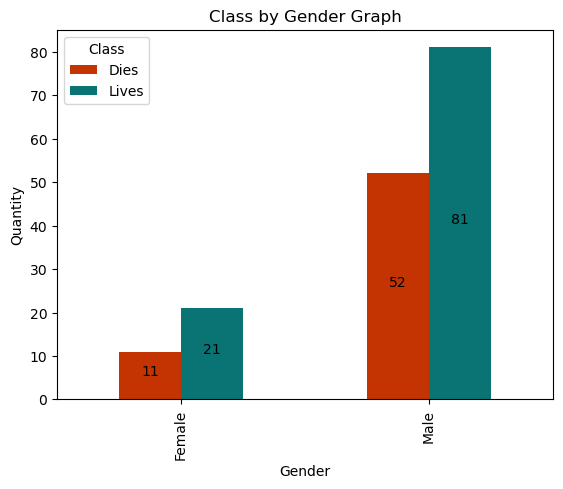

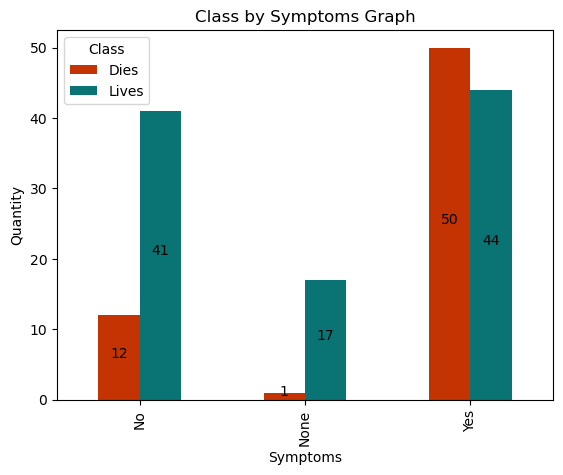

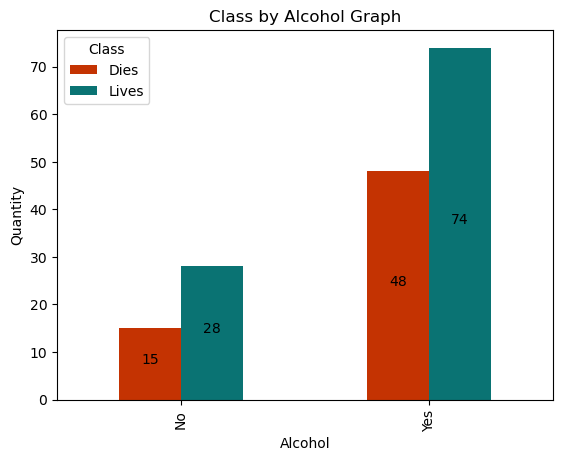

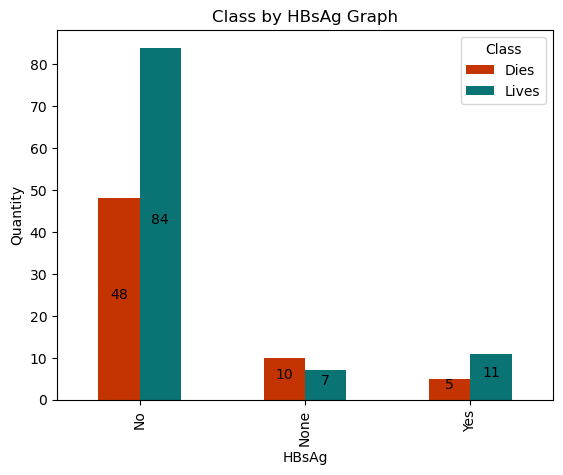

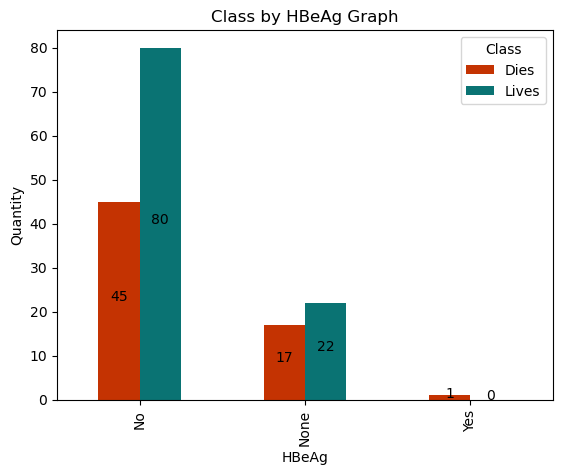

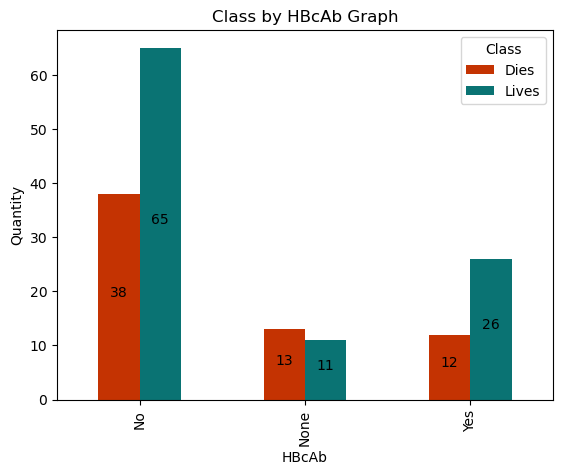

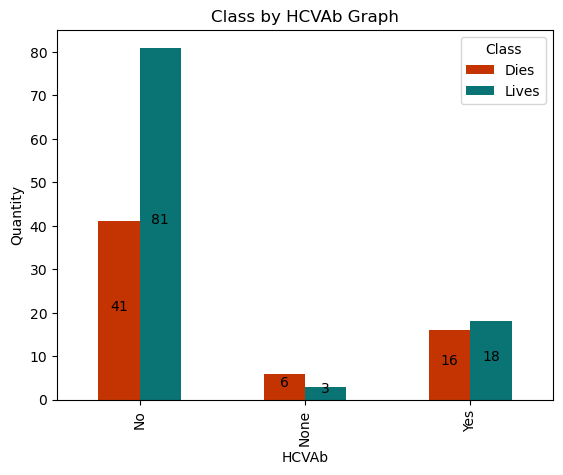

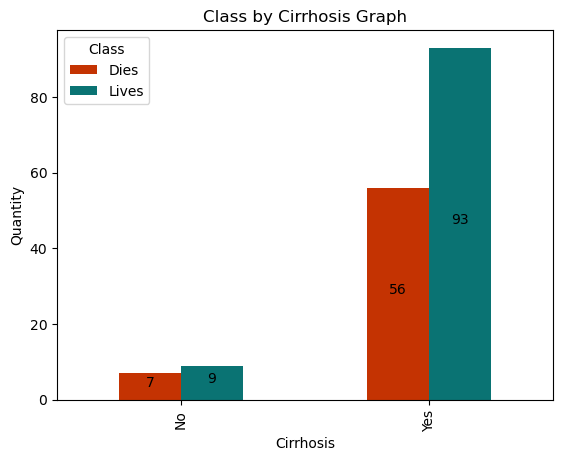

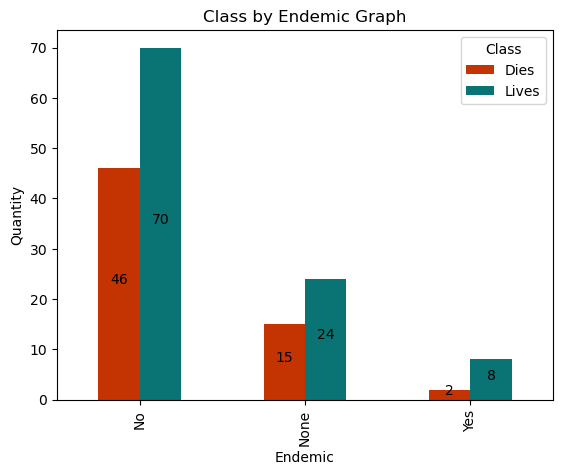

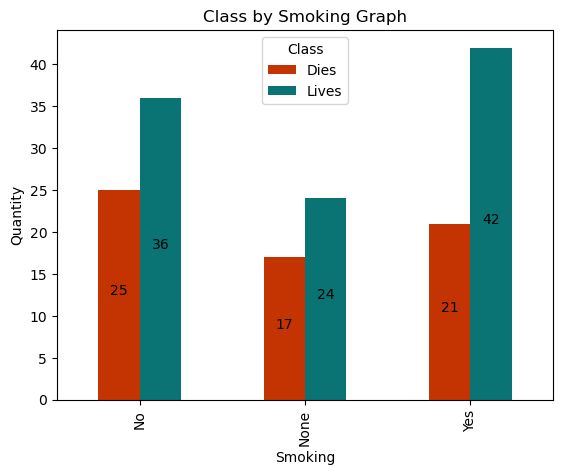

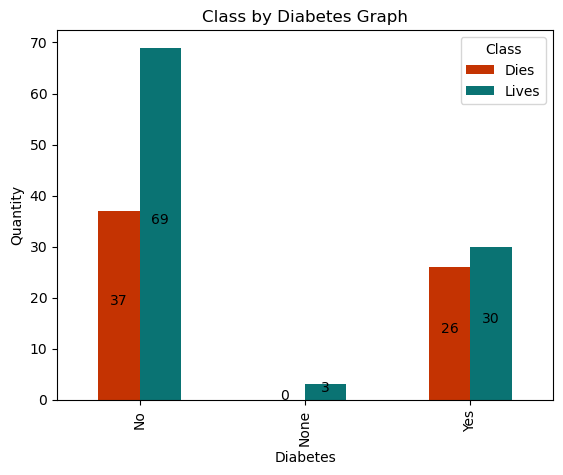

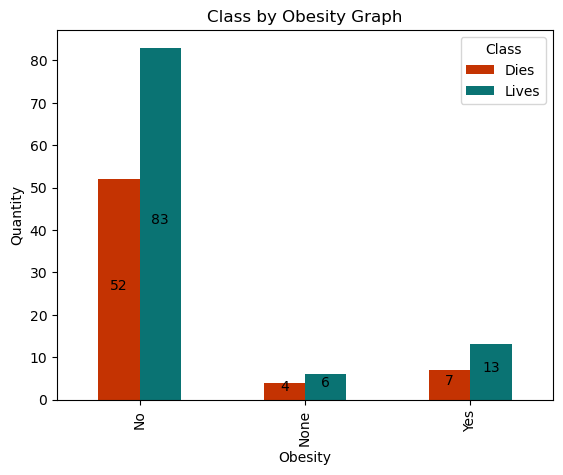

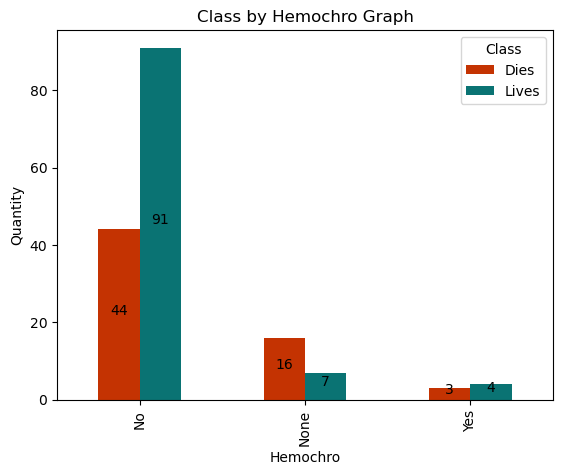

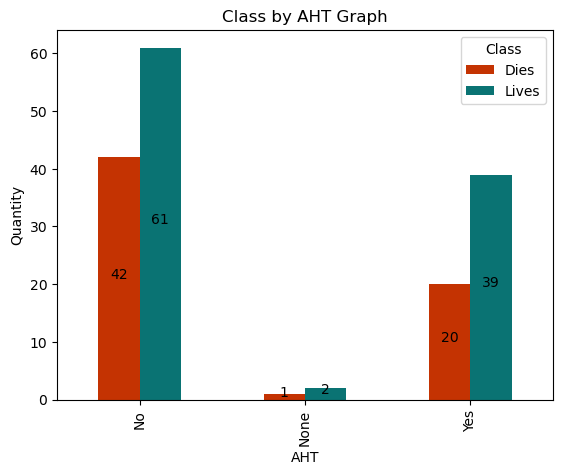

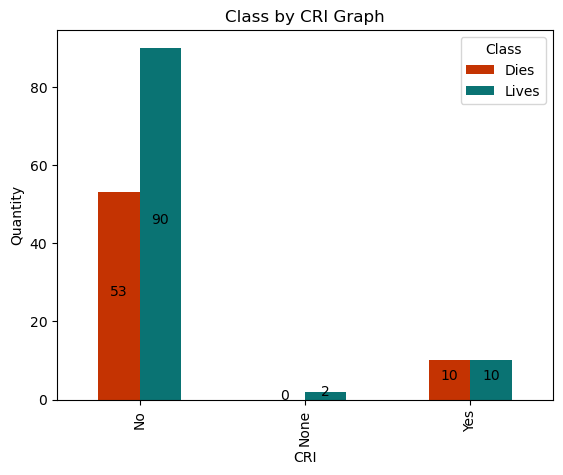

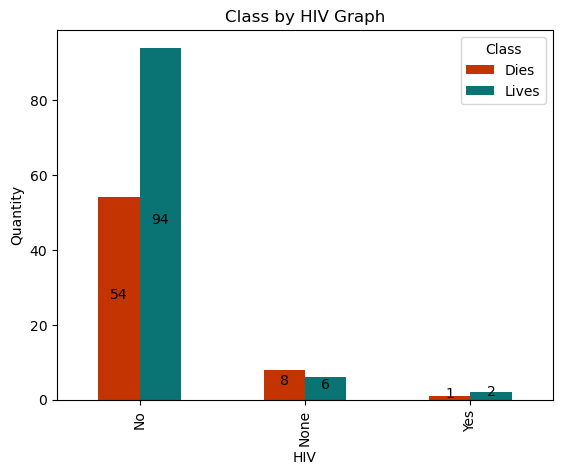

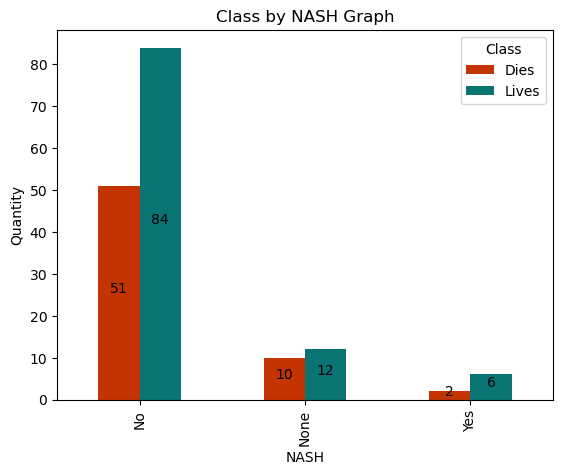

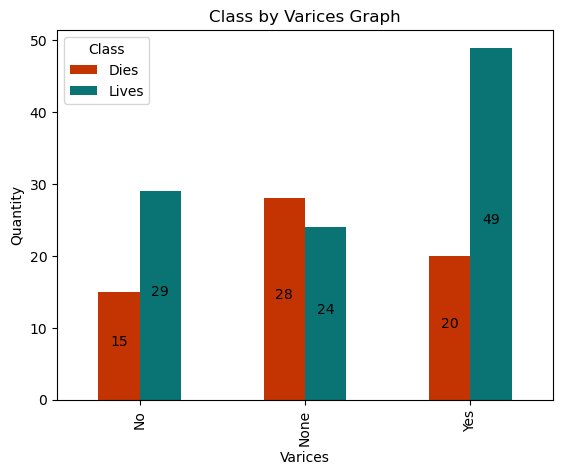

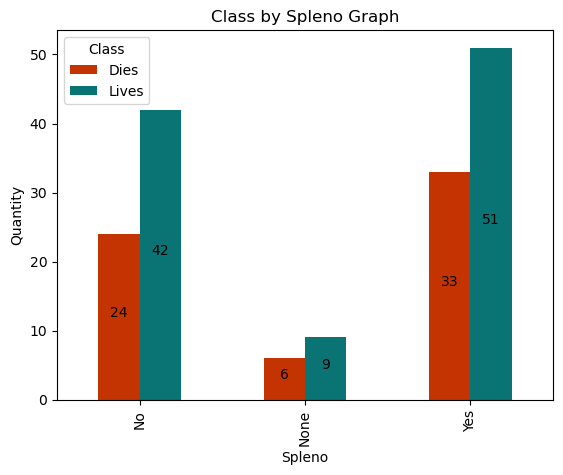

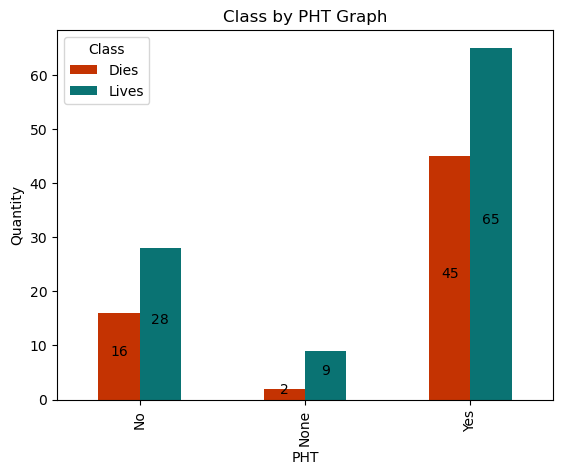

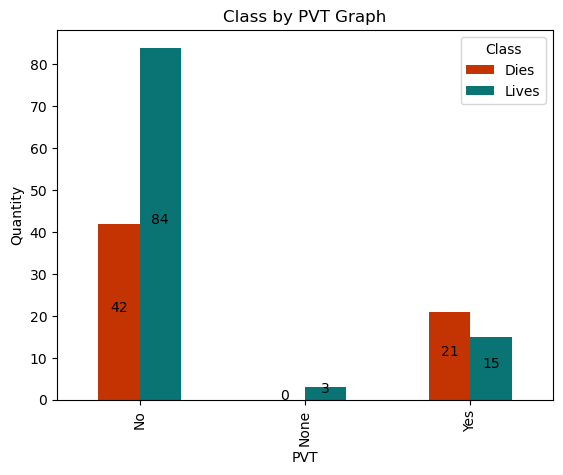

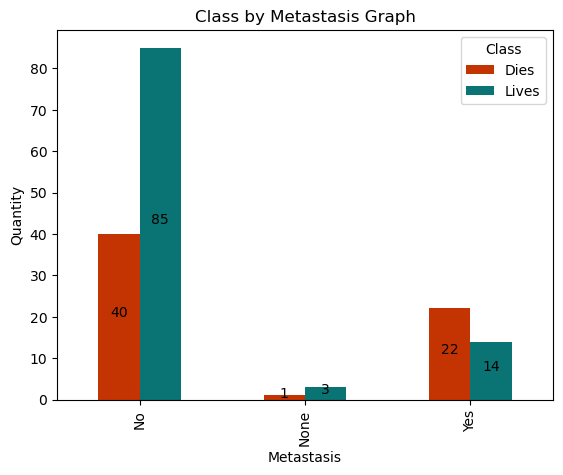

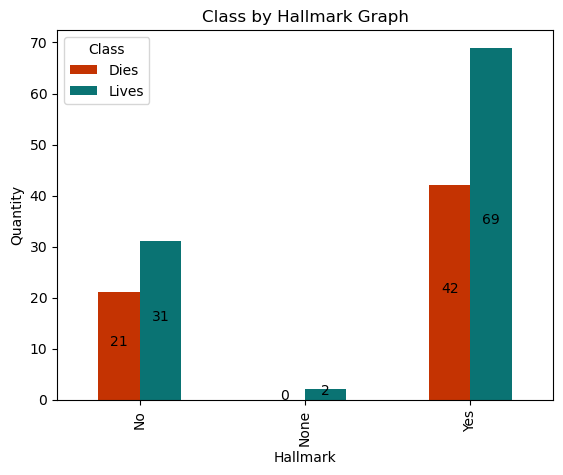

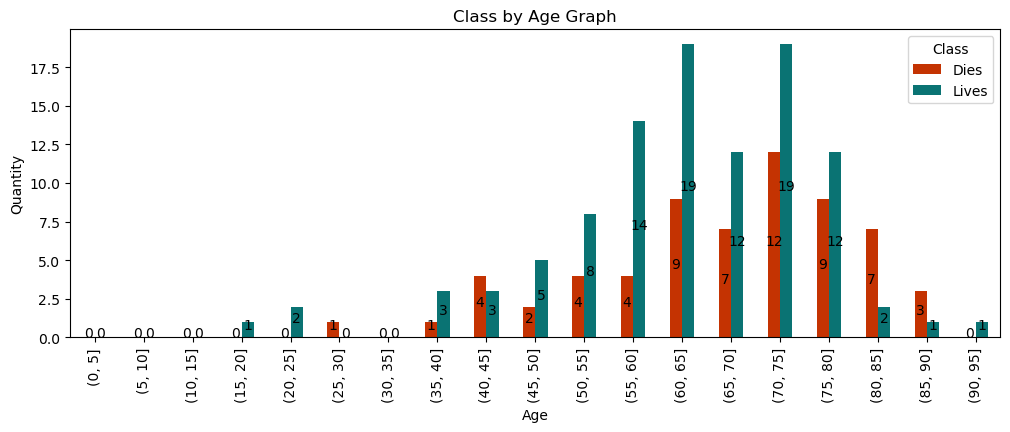

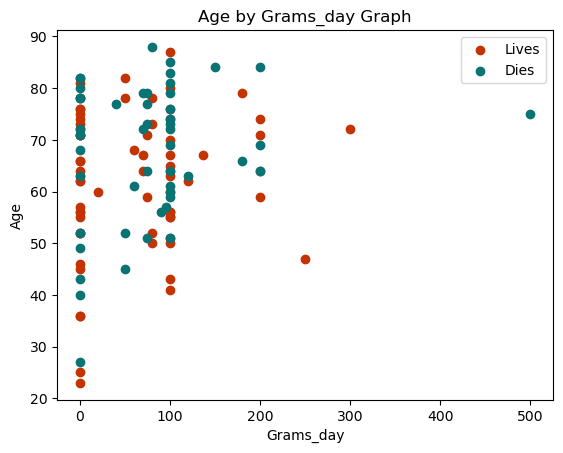

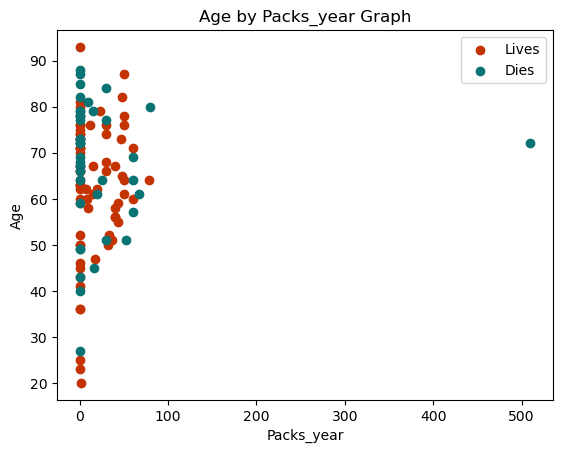

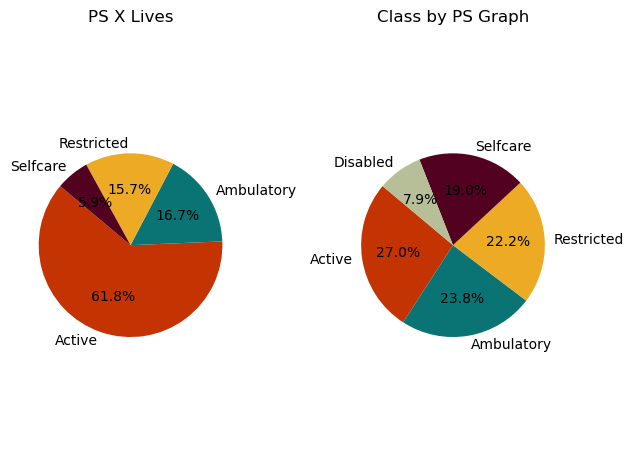

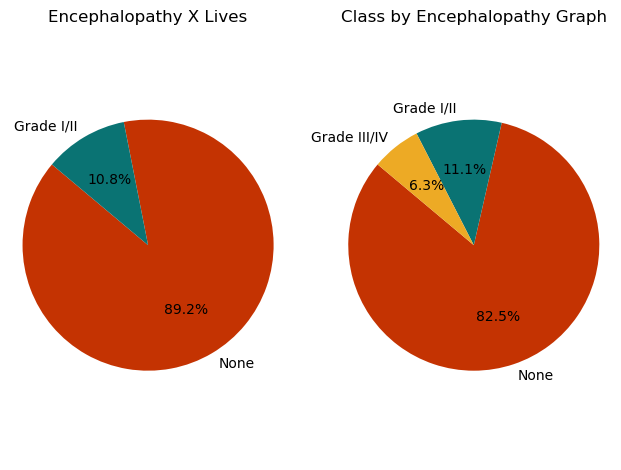

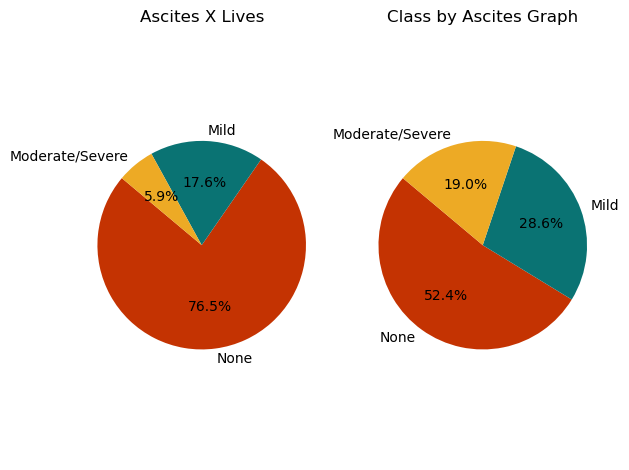

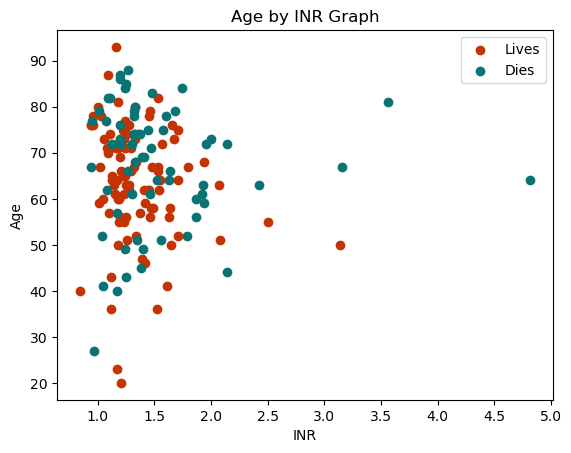

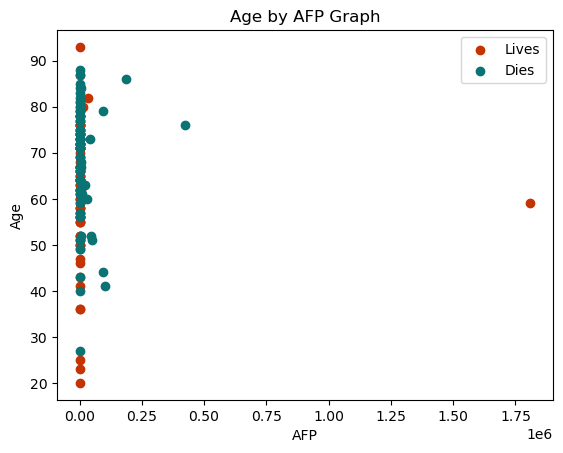

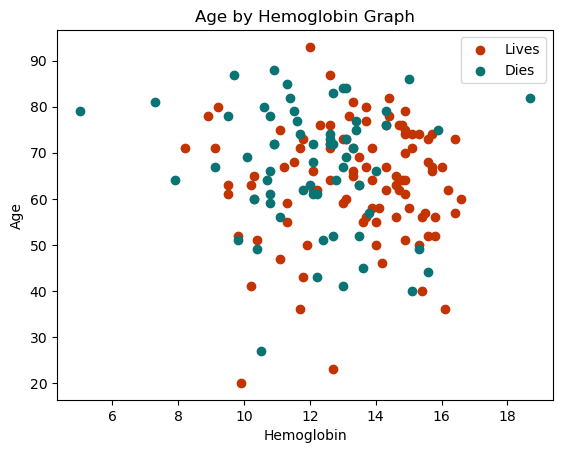

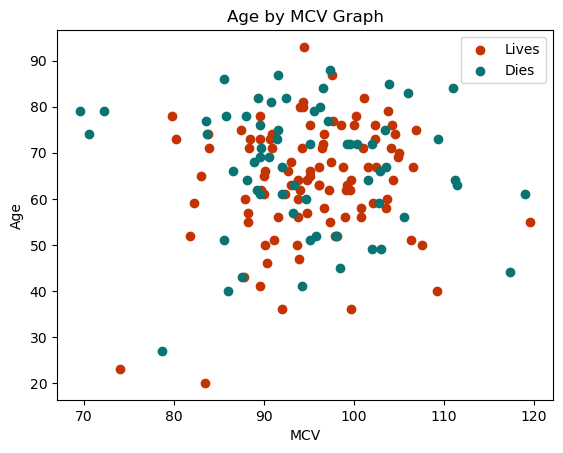

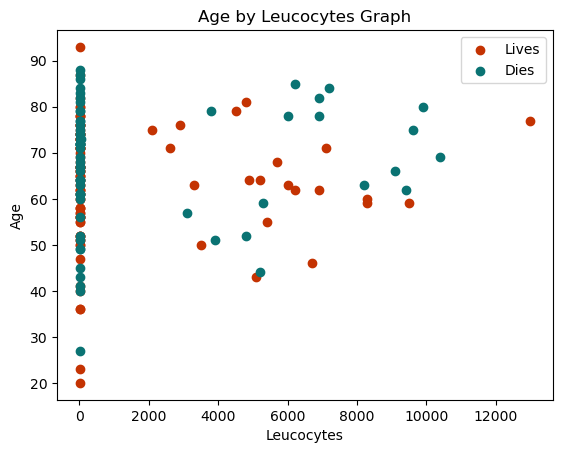

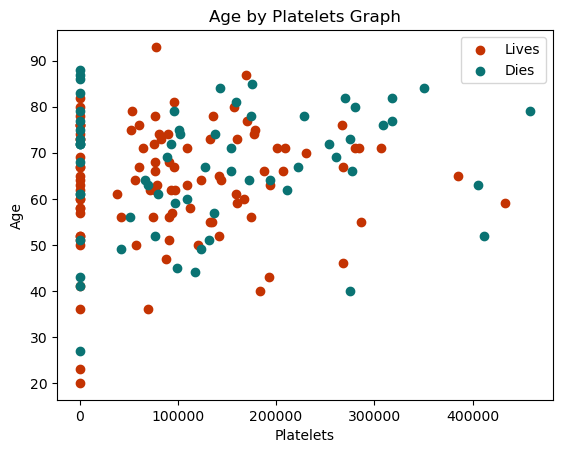

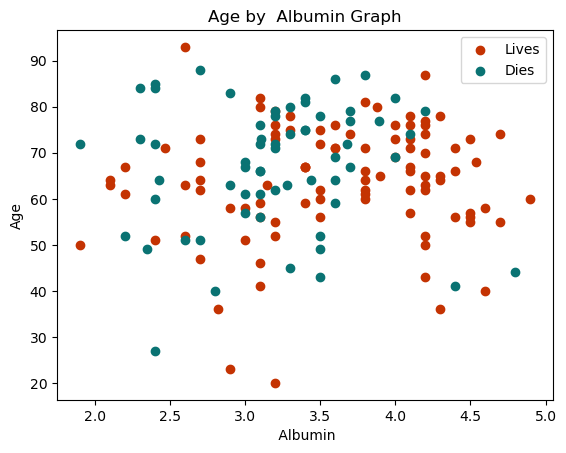

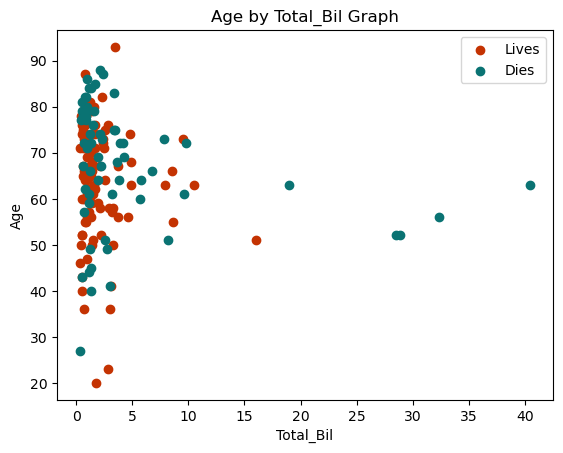

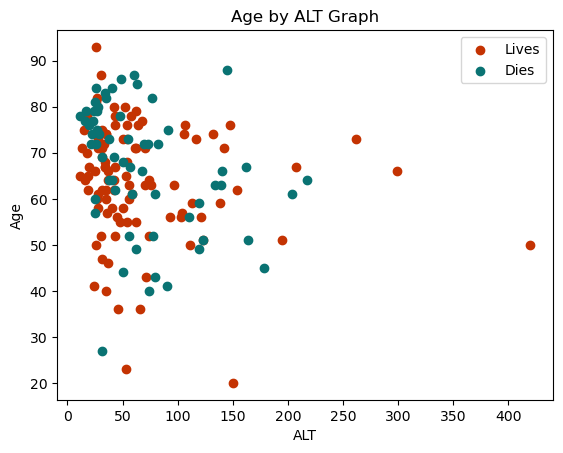

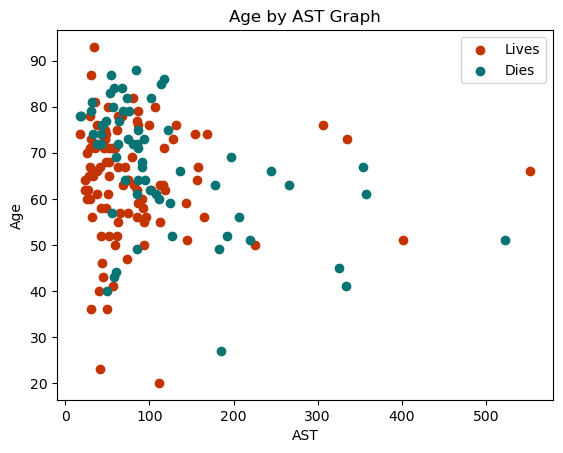

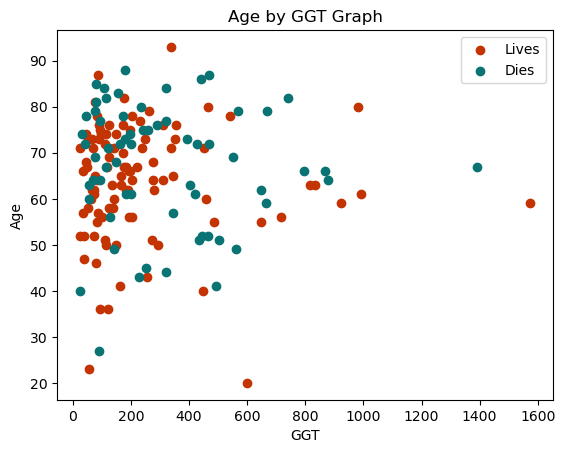

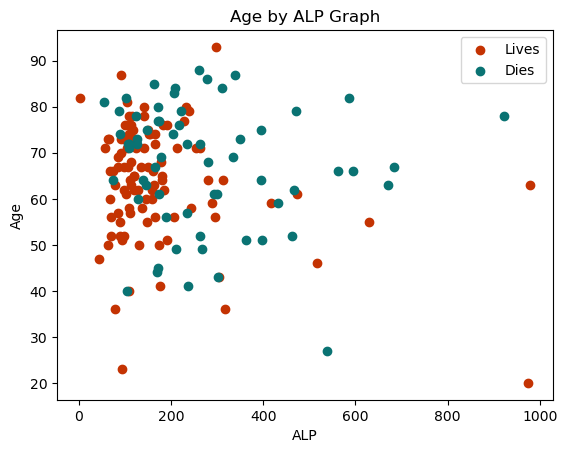

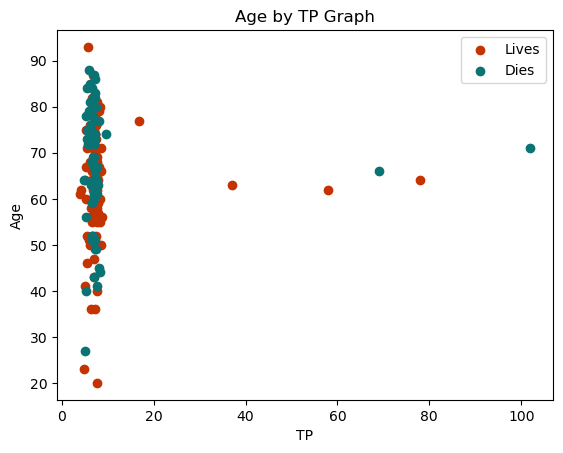

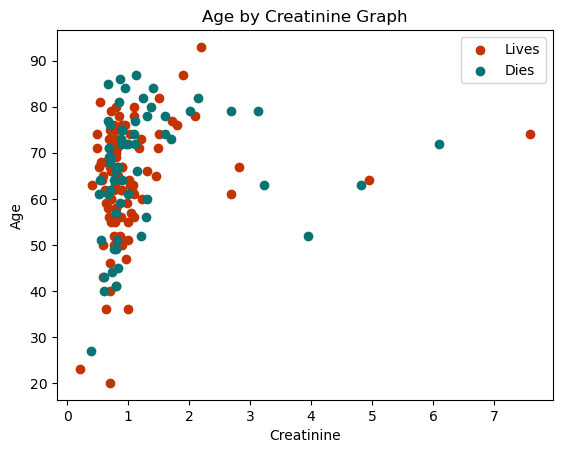

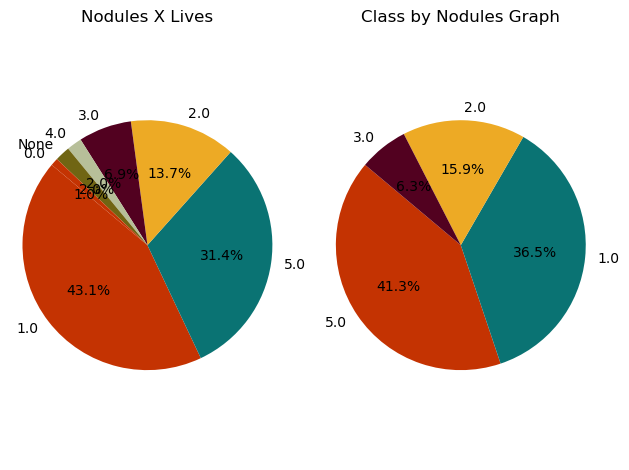

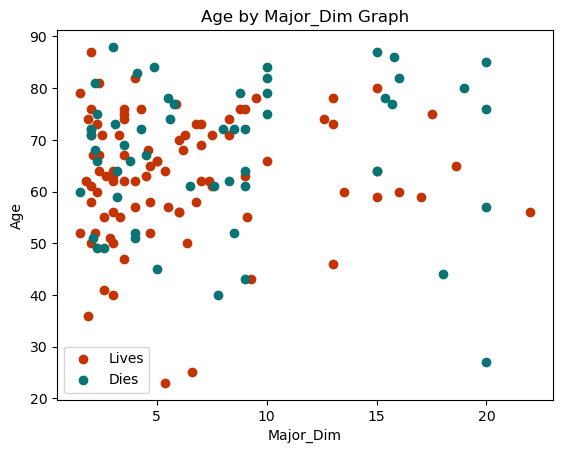

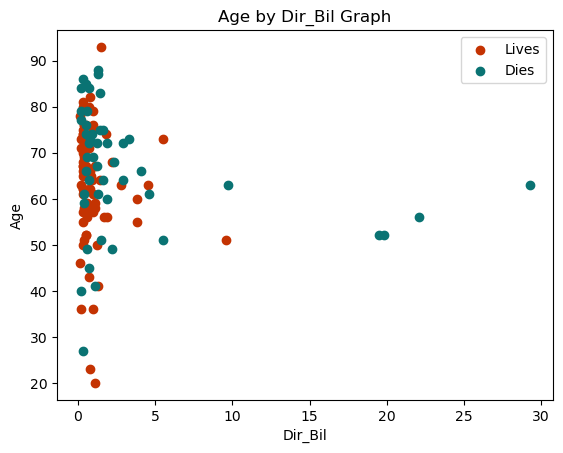

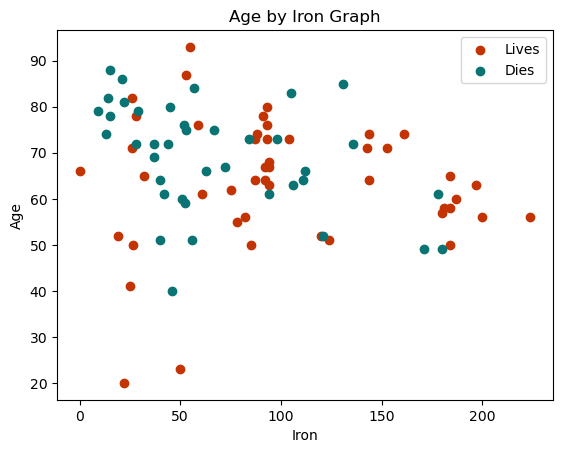

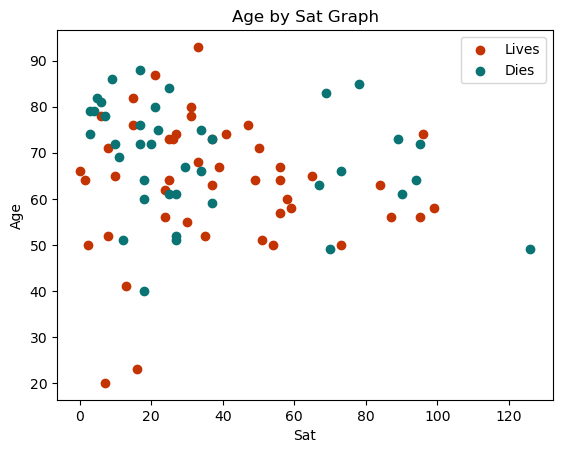

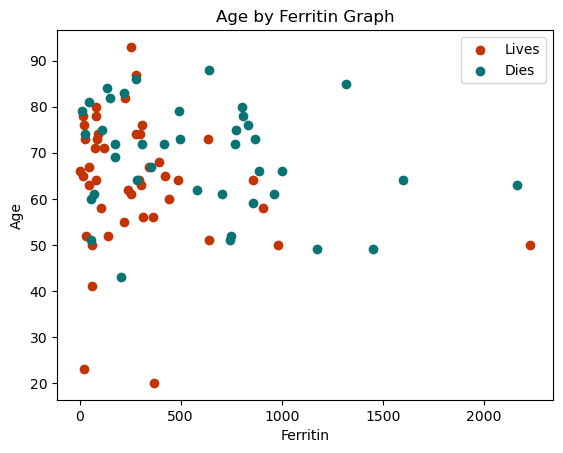

In [16]:
colors = ['#C43302', '#0A7373', '#EDAA25', '#520120', '#B7BF99', '#706513']

#Plotando os gráficos de cada uma das colunas:
for column in hcc.columns[:-1]: # isso remove a coluna Class, pois ela é a nossa base de análise
    #Convertendo os valores que são numéricos para float
    if hcc[column].dtype == 'object' or column == 'Age':
        if not(column in ['PS', 'Encephalopathy', 'Ascites', 'Nodules']):
            plot_bar(column)
        else:
            #Se preferirem deixar só o de gráfico de barra é só apagar esse else, o plot_pie e o if anterior
            plot_pie(column)
    else:
        plot_scatter(column)
    print('\n\n')


In [17]:
'''
Possiveis outliers:
-> Grams_Day (<5 pontos espalhados - distancia > 50% de x)
-> INR (1 ponto muito distante)
-> Packs_Yer
-> INR (<5 pontos espalhados - distancia > 50%) #TALVEZ NÃO SEJA - está mais distribuido que os outros
-> AFP (1 ponto muito distante)
-> Total_Bill (>5 pontos espalhados - distancia > 30% de x)
-> ALT (<5 pontos espalhados - distancia > 50% de x) #Talvez não seja
-> TP (Tem uns pontos se afastando demais) #Talvez não seja também
-> Dir_Bil (<5 pontos espalhados - distancia > 50% de x)

# Talvez tenha outliers no ALP


-> Leucocitos tem vários como zero
-> Platelets tem alguns como zero também

-> Precisamos analisar as possiveis causas e como tratar isso 
'''

'\nPossiveis outliers:\n-> Grams_Day (<5 pontos espalhados - distancia > 50% de x)\n-> INR (1 ponto muito distante)\n-> Packs_Yer\n-> INR (<5 pontos espalhados - distancia > 50%) #TALVEZ NÃO SEJA - está mais distribuido que os outros\n-> AFP (1 ponto muito distante)\n-> Total_Bill (>5 pontos espalhados - distancia > 30% de x)\n-> ALT (<5 pontos espalhados - distancia > 50% de x) #Talvez não seja\n-> TP (Tem uns pontos se afastando demais) #Talvez não seja também\n-> Dir_Bil (<5 pontos espalhados - distancia > 50% de x)\n\n# Talvez tenha outliers no ALP\n\n\n-> Leucocitos tem vários como zero\n-> Platelets tem alguns como zero também\n\n-> Precisamos analisar as possiveis causas e como tratar isso \n'